In [3]:
import numpy
import pandas as pd
import nltk
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv(r'C:/Users/anany/Documents/GitHub/Amazon-Customer-Sentiment/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.drop('Time', axis=1, inplace = True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df['Upvote%'] = numpy.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
df.drop(['HelpfulnessNumerator','HelpfulnessDenominator'], axis=1, inplace = True)
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Upvote%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [8]:
df['Upvote Range'] = pd.cut(df['Upvote%'], bins=[-1.1, 0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Empty', '0-20%','20-40%','40-60%','60-80%','80-100%'])
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text,Upvote%,Upvote Range
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [9]:
df_pivot_table = df.groupby(['Score', 'Upvote Range']).agg({'Id':'count'}).reset_index()
df_pivot_table

,Score,Upvote Range,Id
0,1,Empty,20326
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,14838
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [10]:
df_heatmap = df_pivot_table.pivot(index = 'Upvote Range',columns='Score')
df_heatmap

Id                             
Score             1      2      3      4       5
Upvote Range                                    
Empty         20326  14838  23485  46796  198381
0-20%          2338    762    474    116     432
20-40%         4649   1618   1506    909    2275
40-60%         6586   3051   3384   3185   10312
60-80%         5838   2486   2754   2941   11060
80-100%       12531   7014  11037  26707  140661

<AxesSubplot:xlabel='None-Score', ylabel='Upvote Range'>

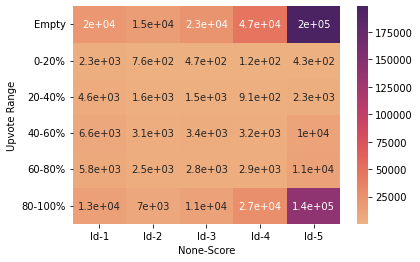

In [11]:
seaborn.heatmap(df_heatmap,annot=True, cmap='flare')

In [16]:
# Removing the rating inputs of 3-star as they are neither positive nor negative reviews
df = df[df['Score']!=3]
df['Score'].unique()

# Taking df['Text'] to be the data to work on 
X = df['Text']

In [17]:
# Mapping Score = 4,5 as positive (y=1) and Score = 1,2 as negative (y=0)
mapping_guide = {1:0,2:0,4:1,5:1}
y = df['Score'].map(mapping_guide)

In [20]:
CountVectorizer_var = CountVectorizer(stop_words='english')
X_count = CountVectorizer_var.fit_transform(X)
X_count.shape

(525814, 114969)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_count,y)
X_test.shape


(131454, 114969)